> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb movie dataset contains about a thousand films released in the past period and contains information about film production such as film cost, revenue, cast, directors, production company, etc.
In this project, I will analyze data by cleaning the data, providing some visual graphics and providing answers to the questions received


### Question(s) for Analysis
>1- which movies get the highest votes?

>2- Which Month Released Highest Number Of Movies In All Of The Years?

>3-Which year has the highest release of movies?

>4- which Movie has Highest budget And which one has lowest budget?

>5- Which genres are most popular?

>6- which Production Companies has Higher Number Of Release?




In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


In [229]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [230]:
tmdb_df = pd.read_csv('tmdb-movies.csv')

In [231]:
print(tmdb_df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [232]:
print(tmdb_df.shape)

(10866, 21)


In [233]:
tmdb_df.describe

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt2395

In [234]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

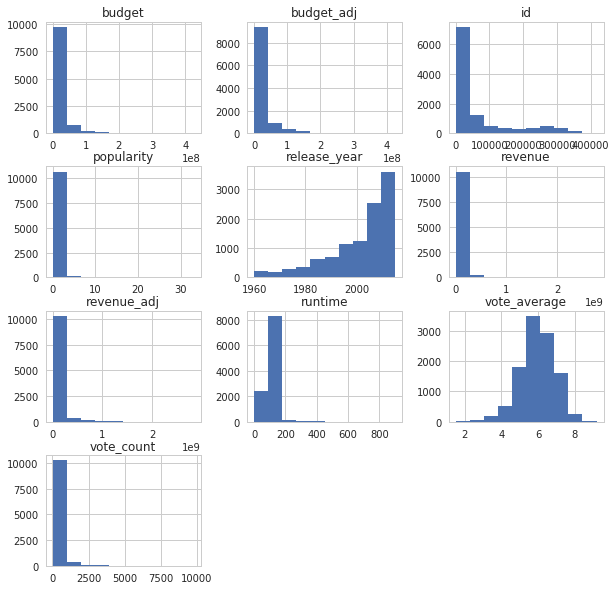

In [235]:
tmdb_df.hist(figsize = (10, 10));

##### Some stats about the dataset

In [236]:
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [237]:
tmdb_df.duplicated().sum()

1


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

 #### Remove Duplicates
 >'duplicated()' function Shows us that there is only one duplicate row that needs to be removed

In [238]:
tmdb_df.drop_duplicates(inplace=True)

#### Remove the unused colums
>There are unhelpful columns in the data analysis process
Such as imdb_id,homepage,tagline,overview ,budget_adj and revenue_adj


In [239]:
tmdb_df.drop(columns = ['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [240]:
tmdb_df.shape

(10865, 15)

#### Change Format Of Release Date
>Changing Format Of Release Date from string format Into Datetime format

In [241]:
tmdb_df['release_date']=pd.to_datetime(tmdb_df['release_date'])

In [242]:
tmdb_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### 1- which movies get the highest votes?


In [243]:
def find_minmax(x):
    high_index = tmdb_df[x].idxmax()
    high = pd.DataFrame(tmdb_df.loc[high_index,:])
    print("Movie Which Has Highest "+ x + " : ",tmdb_df['original_title'][high_index])
    
find_minmax('vote_average')


Movie Which Has Highest vote_average :  The Story of Film: An Odyssey


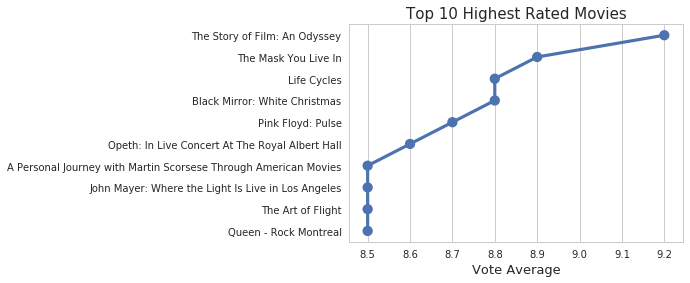

In [244]:
info = pd.DataFrame(tmdb_df['vote_average'].sort_values(ascending = False))
info['original_title'] = tmdb_df['original_title']
tmdb_data = list(map(str,(info['original_title'])))
x = list(tmdb_data[:10])
y = list(info['vote_average'][:10])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
sns.set_style("darkgrid")

##### In this graph we can see the top 10 movies in terms of ratings.
##### The highest rated movie is the story of film:an odyssey.

### 2- Which Month Released Highest Number Of Movies In All Of The Years?


In [245]:
release=tmdb_df['release_date'].dt.month.value_counts().sort_index()
print(release)

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64


Text(0,0.5,'Number of movie releases')

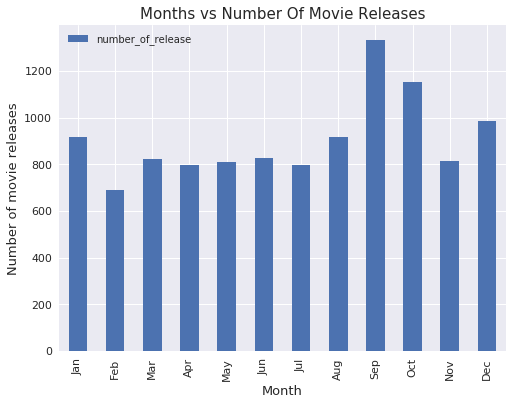

In [246]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
release = pd.DataFrame(release)
release['month'] = months
release.rename(columns = {'release_date':'number_of_release'},inplace=True)
release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

##### in this  graph we can see  the highest number of release in september and october month.

### 3-  Which year has the highest release of movies?¶


In [247]:
data=tmdb_df.groupby('release_year').count()['id']

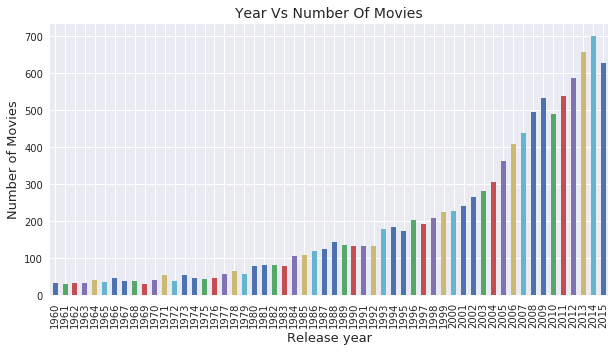

In [248]:
data.plot.bar(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number of Movies',fontsize = 13)
sns.set_style("whitegrid")

##### in this  graph we can see which year has the highest  release of movies
##### year has the highest release of movies was 2014


### 4- which Movie has Highest budget And which one has lowest budget?


In [249]:
def find_minmax(x):
  
    m_index = tmdb_df[x].idxmin()
    h_index = tmdb_df[x].idxmax()
    high = pd.DataFrame(tmdb_df.loc[h_index,:])
    low = pd.DataFrame(tmdb_df.loc[m_index,:])
    print("Movie Which Has Highest "+ x + " : ",tmdb_df['original_title'][h_index])
    print("Movie Which Has Lowest "+ x + "  : ",tmdb_df['original_title'][m_index])
   
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Mr. Holmes


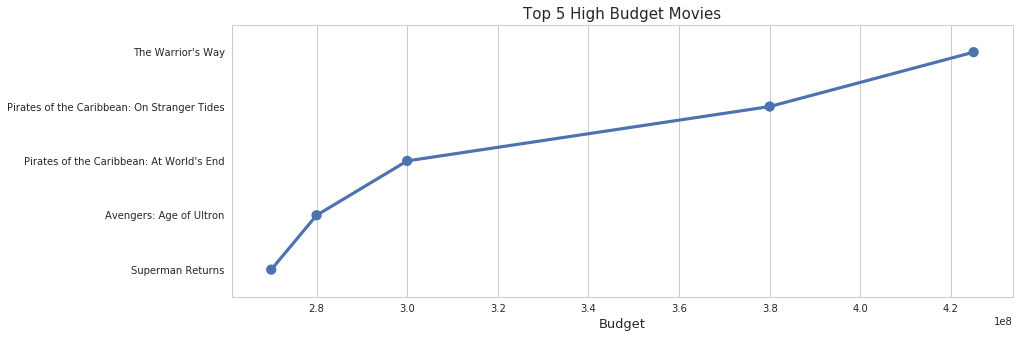

In [250]:
info = pd.DataFrame(tmdb_df['budget'].sort_values(ascending = False))
info['original_title'] = tmdb_df['original_title']
data = list(map(str,(info['original_title'])))

x = list(data[:5])
y = list(info['budget'][:5])

ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

##### in this graph we can see the top 10 High Budget Movies

##### the Movie Which Has Highest budget is The Warrior's Way

### 5- Which genres are most popular?

In [251]:
def data(x):
    data_plot = tmdb_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
        
    return info


In [252]:
genre_movies = data('genres')
print(genre_movies)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


Text(0,0.5,'Genres')

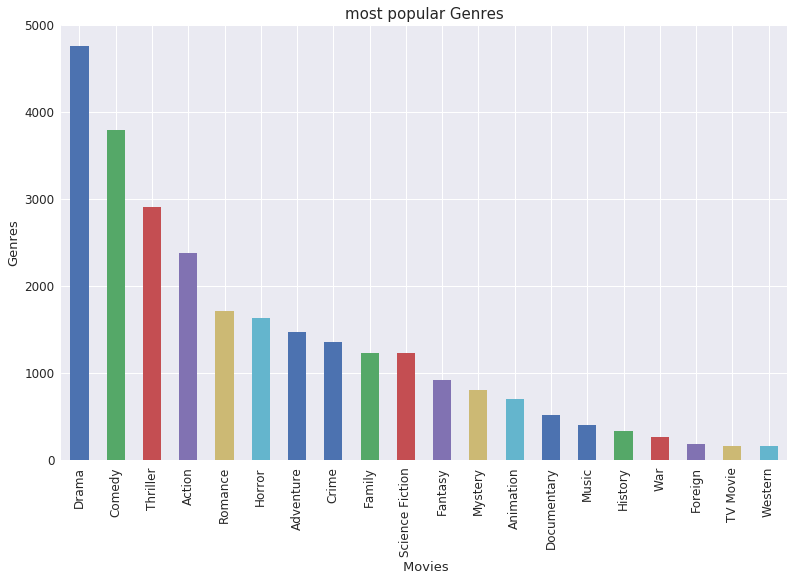

In [253]:
genre_movies.plot(kind= 'bar',figsize = (13,8),fontsize=12)
plt.title("most popular Genres",fontsize=15)
plt.xlabel(' Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

##### in this graph we can see Genre With Highest Release.
##### Drama genre has the highest release of movies.


### 6- which Production Companies has Higher Number Of Release?


In [254]:
def data(x):
    data_plot = tmdb_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
        
    return info

In [255]:
p_co = data('production_companies')
print(p_co)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
Village Roadshow Pictures                  88
20th Century Fox                           88
DreamWorks SKG                             88
BBC Films                                  87
Dimension Films                            82
United Artists                             76
Orion Pictures                    

##### Universal Pictures Companies has Higher Number Of Release

<a id='conclusions'></a>
## Conclusions

>the movie  Has Highest vote_average was The Story of Film: An Odyssey

>The Story of Film: An Odyssey,the mask you live in ,life cycles and black mirrior are four most-rated movies

>the higher number of release in september 

>Drama is the most popular genre

>Drame, Comedy, Thriller and Action are four most popular genres. 

>year has the highest release of movies was 2014

>Movie Which Has Highest budget was The Warrior's Way

>Movie Which Has Lowest budget was Mr. Holmes

>Warner Bros earn more lifetime profit than other production companies.



### Limitations
> not sure if the data is complete and up-to-date or not. Also, the revenue and budget columns do not have currency unit. This could affect the overall analysis.  split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [256]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0